## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups=merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dups_all= merged_df.loc[merged_df['Mouse ID']=='g989']
dups_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merged_df[merged_df['Mouse ID'] != 'g989']# If Mouse ID does not equal g989 add it to new dataframe
check_dup_drop=clean_df.loc[clean_df['Mouse ID']=='g989']
check_dup_drop# Should be empty

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [6]:
# Checking the number of mice in the clean DataFrame.
print(clean_df['Mouse ID'].nunique())# Should be 1 less than above
clean_df.head()

248


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen # This method returns Series Objects
mean=clean_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median=clean_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').median()['Tumor Volume (mm3)']                                          
variance=clean_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').var()['Tumor Volume (mm3)']                                                  
std=clean_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').std()['Tumor Volume (mm3)']                            
sem=clean_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistics_dict={
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard_Deviation': std,
    'Standard_Error_of_Mean': sem
}
summary_df=pd.DataFrame(statistics_dict)
# This method produces everything in a single groupby function
summary_df=clean_df.groupby('Drug Regimen').agg({'Drug Regimen': 'first',
                                                    'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

## Bar and Pie Charts

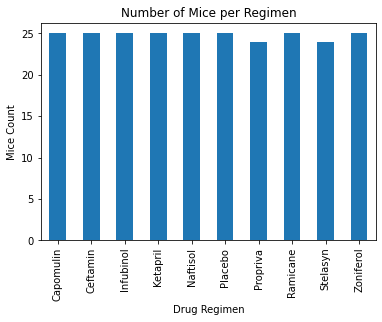

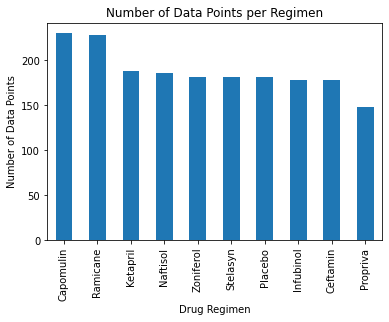

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of 
# the study using pandas.
clean_no_id_dups=clean_df.drop_duplicates(subset='Mouse ID')
grouped=clean_no_id_dups.groupby('Drug Regimen')
count=grouped['Drug Regimen'].count()
count_plot=count.plot(kind='bar')
count_plot.set_ylabel('Mice Count')
count_plot.set_title('Number of Mice per Regimen')
plt.show()

# Alternatively upon discussion it is decided that by viewing the number of mice instead of data points
# important information about mice survival is lost.  So, this alternate method is as follows:
counts=clean_df['Drug Regimen'].value_counts()
# plot and format
counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Regimen')
plt.show()
# I will only show the alternate method here.

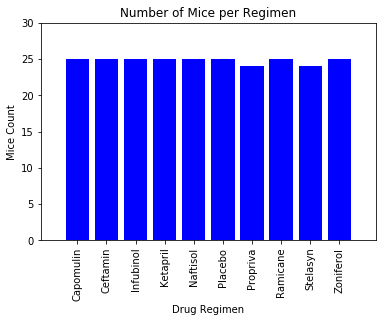

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout 
# the course of the study using pyplot.
grouped_regimen=clean_df.groupby('Drug Regimen')
series_regimen_u=grouped_regimen['Mouse ID'].unique() #Returns Series Object
mouse_count=[len(mouse) for mouse in series_regimen_u]# y axis
# I did not need to use the summary_df I made above. I could have just used the series_regimen_u.index from here.
regimen_list=summary_df.index # x axis
x_axis=np.arange(len(regimen_list))
# plot and format
plt.bar(x_axis, mouse_count, color='b', align='center', width=.8)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_list, rotation=90)
plt.xlim(-1.25, len(x_axis)+.25)
plt.ylim(0, max(mouse_count)+5)
plt.title('Number of Mice per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.show()

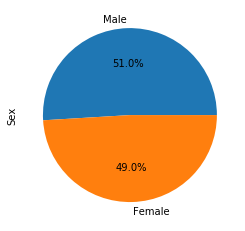

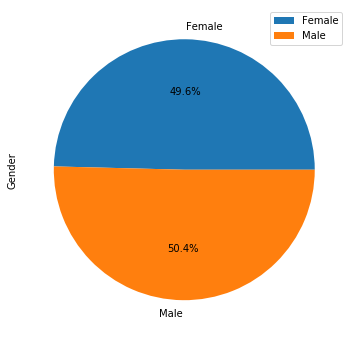

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# I am showing more work here than necissary to show understanding of different techniques.

# Method 1 using value_counts() and all datapoints
counts=clean_df['Sex'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.show()

# Method 2 Using groupby() and just the number of mice (no timepoint/mouse dups)
grouped_gender=clean_no_id_dups.groupby(['Sex'])
gender_counts=grouped_gender['Mouse ID'].count()
count=[num for num in gender_counts]
genders=gender_counts.keys()
gender=(gen for gen in genders)
pie_df=pd.DataFrame({gender: count}, index=gender)
plot = pie_df.plot(kind='pie', y=gender, autopct='%1.1f%%', figsize=(6,6))
plot.set_ylabel('Gender')
plt.show()

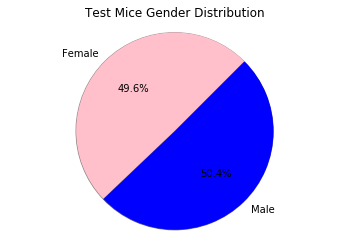

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors=['pink', 'blue']
explode=(0, 0.05)
plt.title('Test Mice Gender Distribution')
plt.pie(count, explode=explode, radius=10, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
select_regemen=clean_df[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
# Start by getting the last (greatest) timepoint for each mouse
case_is_max=select_regemen.groupby(['Mouse ID'])['Timepoint'].transform(max)==select_regemen['Timepoint']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint=select_regemen[case_is_max]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimen=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for each_drug in regimen:
    #filter_df=max_time_study.loc[:, 'Drug Regimen']=='Capomulin'
    # Filtering by drug regimen
    filter_df=max_timepoint.loc[:, 'Drug Regimen']==each_drug
    four_quantiles=[.25, .5, .75]
    # Create new DF based on drug regimen filter and only take Tumor Volume column
    one_drug_tumor_vol=max_timepoint.loc[filter_df, 'Tumor Volume (mm3)']
    # append only Tumor Volume numbers into the list
    tumor_vol_list.append(one_drug_tumor_vol)
    # Calculate the quantiles based on the Tumor Volumen for a single drug
    quartiles=one_drug_tumor_vol.quantile(four_quantiles)
    lowerq=quartiles.loc[.25]
    upperq=quartiles.loc[.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds
    # add subset
    outliers=one_drug_tumor_vol.loc[(one_drug_tumor_vol>upper_bound) | (one_drug_tumor_vol<lower_bound)]
    #outlier_count=one_drug_tumor_vol.loc[outliers]
    outlier_count=len(outliers)
    print(f'There are {outlier_count} outliers for {each_drug}')

There are 0 outliers for Capomulin
There are 0 outliers for Ramicane
There are 1 outliers for Infubinol
There are 0 outliers for Ceftamin


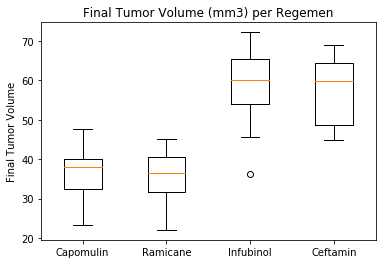

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_xticklabels(regimen)
ax1.set_ylabel('Final Tumor Volume')
ax1.set_title('Final Tumor Volume (mm3) per Regemen')
ax1.boxplot(tumor_vol_list)
plt.show()

## Line and Scatter Plots

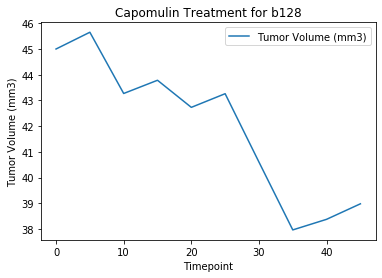

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
filter_df=clean_df.loc[:, 'Drug Regimen']=='Capomulin'
capomulin=clean_df.loc[filter_df, :]
filter_df=capomulin.loc[:, 'Mouse ID']=='b128'
one_mouse=capomulin.loc[filter_df, :]
# plot and format
one_mouse.plot('Timepoint', 'Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment for b128')
plt.show()

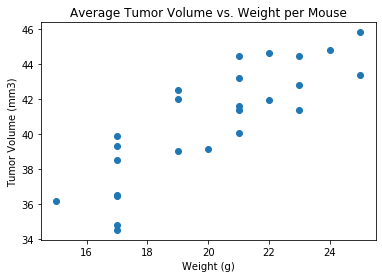

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin.head()
capomulin_avg=capomulin[['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']].groupby('Mouse ID').mean()
# plot and format
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Weight per Mouse')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=st.pearsonr(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])[0]
print(f'Correlation is {corr}')

Correlation is 0.8419363424694717


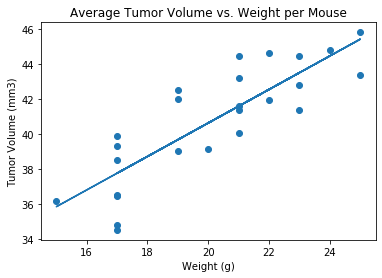

In [19]:
# Slope of Line y=mx+b /lm = linear model
m, b, r, p, std=st.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
y_pred=m*capomulin_avg['Weight (g)']+b
# Plot
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
# Plot
plt.plot(capomulin_avg['Weight (g)'], y_pred)
# format
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Weight per Mouse')
plt.show()